<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-11-20 23:39:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  31.4MB/s    in 1.1s    

2021-11-20 23:39:01 (31.4 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [11]:
df.head()

,sql
0,"CREATE TABLE ""master"" (\n""index"" INTEGER,\n ""..."


## Demo: How to list all tables


In [110]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df_tables=pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
QUERY='Select * from Master'
df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


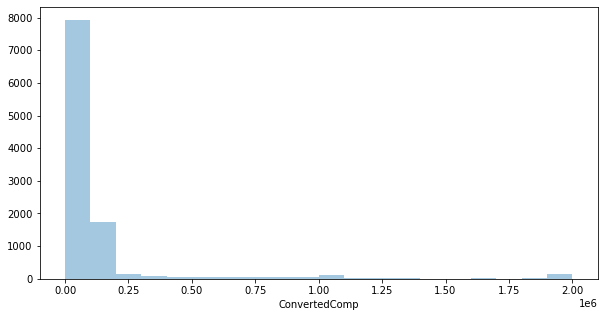

In [13]:
# your code goes here

plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,kde=False)
plt.show()

### Box Plots


Plot a box plot of `Age.`


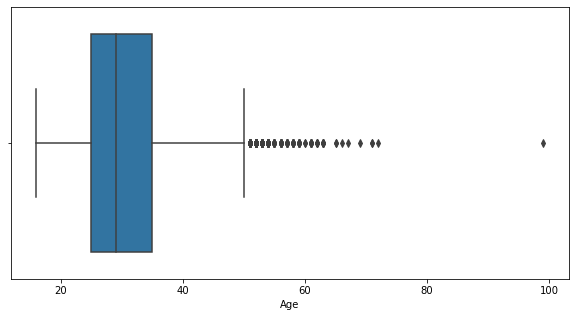

In [14]:
# your code goes here

plt.figure(figsize=(10,5))
sns.boxplot(x=df.Age, data=df)
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


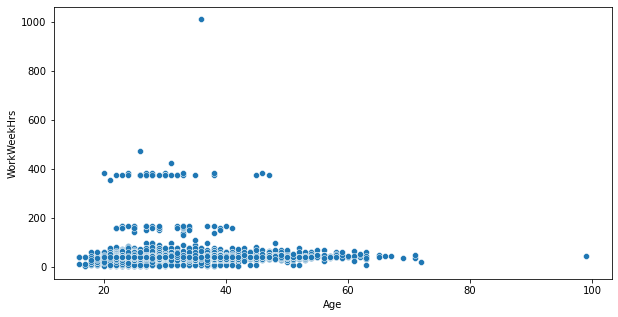

In [15]:
# your code goes here
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.WorkWeekHrs, data=df)
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


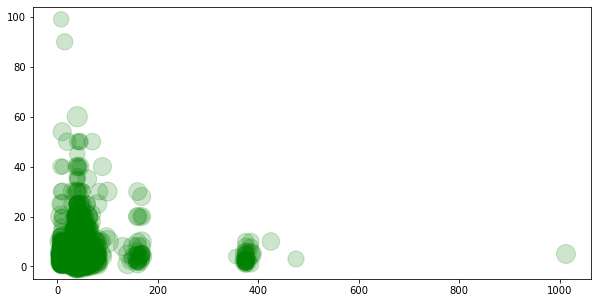

In [16]:
# your code goes here

plt.figure(figsize=(10,5))
plt.scatter(x=df.WorkWeekHrs, y=df.CodeRevHrs, c='green', alpha=0.2, s=df.Age*10)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [112]:
df_tables

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [139]:
q="""
                  SELECT Respondent, DatabaseWorkedWith as DB, count(DatabaseWorkedWith) as Respondents 
                  FROM DatabaseWorkedWith group by Respondent
                  having count(DatabaseWorkedWith)=1
                  order by count(DatabaseWorkedWith) """
                  
                  

dff = pd.read_sql(q, conn)



In [143]:
dff.DB.value_counts()

Microsoft SQL Server    845
MySQL                   474
PostgreSQL              351
SQLite                  192
MongoDB                 170
Oracle                  162
Other(s):                94
Firebase                 90
MariaDB                  44
DynamoDB                 28
Elasticsearch            27
Redis                    20
Cassandra                10
Couchbase                 8
Name: DB, dtype: int64

In [104]:
# your code goes here
#Current DB Work


df_db = pd.read_sql("""
                  SELECT DatabaseWorkedWith as DB, count(DatabaseWorkedWith) as Respondents 
                  FROM DatabaseWorkedWith group by DatabaseWorkedWith
                  order by count(DatabaseWorkedWith) desc limit (5)
                  """, conn)


df_db_desire = pd.read_sql("""
                  SELECT DatabaseDesireNextYear as DB, count(DatabaseDesireNextYear) as Respondents 
                  FROM DatabaseDesireNextYear group by DatabaseDesireNextYear
                  order by count(DatabaseDesireNextYear) desc limit (5)
                  """, conn)


df_lang_desire = pd.read_sql("""
                  SELECT LanguageDesireNextYear as Language, count(LanguageDesireNextYear) as Respondents 
                  FROM LanguageDesireNextYear group by LanguageDesireNextYear
                  order by count(LanguageDesireNextYear) desc limit (5)
                  """, conn)

df_lang_worked = pd.read_sql("""
                  SELECT LanguageWorkedWith as Language, count(LanguageWorkedWith) as Respondents 
                  FROM LanguageWorkedWith group by LanguageWorkedWith
                  order by count(LanguageWorkedWith) desc limit (50)
                  """, conn)

In [105]:
df_lang_worked.head(10)

,Language,Respondents
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [106]:
df_db_sql.head(10)

,DB,Respondents
0,SQLite,3248
1,PostgreSQL,4097
2,MySQL,5469


In [107]:
df_db_sql.Respondents.sum()

12814

In [108]:
df_db.head(5)

,DB,Respondents
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016


In [109]:
df_lang_desire.head(5)

,Language,Respondents
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [92]:
# Calculating Percentage
df_db['percent'] = (df_db['Respondents'] / 
                  df_db['Respondents'].sum()) * 100

In [93]:
df_db.head()

,DB,Respondents,percent
0,MySQL,5469,27.427282
1,Microsoft SQL Server,4110,20.611836
2,PostgreSQL,4097,20.546640
3,SQLite,3248,16.288867
4,MongoDB,3016,15.125376


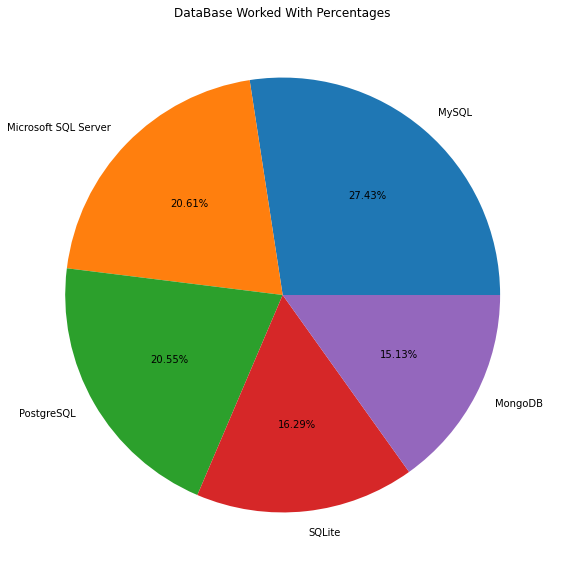

In [94]:
plt.figure(figsize=(10,10))
plt.pie(df_db.percent, labels=df_db.DB,
       autopct='%.2f%%')
plt.title("DataBase Worked With Percentages")
plt.show()

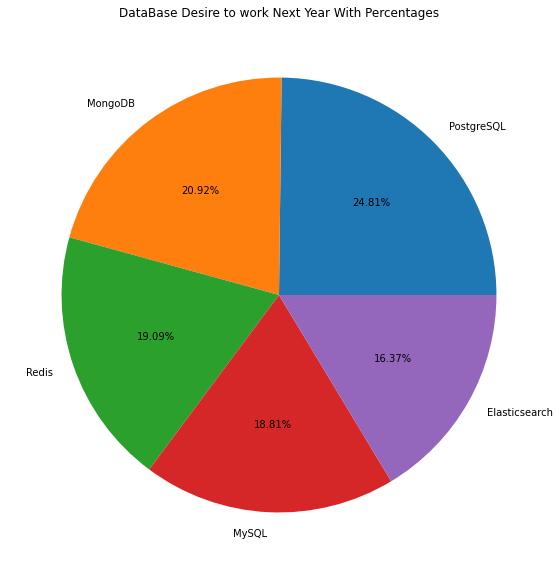

In [97]:
# Calculating Percentage
df_db_desire['percent'] = (df_db_desire['Respondents'] / 
                  df_db_desire['Respondents'].sum()) * 100

plt.figure(figsize=(10,10))
plt.pie(df_db_desire.percent, labels=df_db_desire.DB,
       autopct='%.2f%%')
plt.title("DataBase Desire to work Next Year With Percentages")
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [57]:
# your code goes here
df.WorkWeekHrs.median()


40.0

<AxesSubplot:xlabel='Age'>

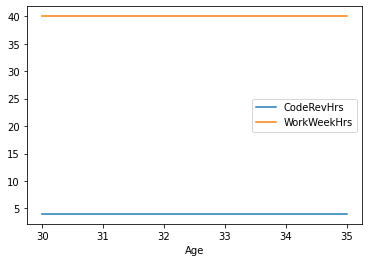

In [68]:
df[df.Age.between(30,35)].groupby('Age')[['CodeRevHrs','WorkWeekHrs']].median().plot(kind='line')

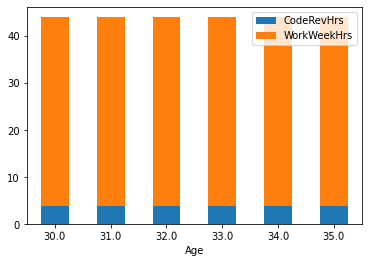

In [72]:
df[df.Age.between(30,35)].groupby('Age')[['CodeRevHrs','WorkWeekHrs']].median().plot(kind='bar',stacked=True,rot=1)
plt.show()

In [73]:
df.CodeRevHrs.median()

4.0

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

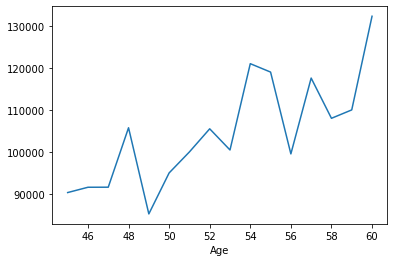

In [67]:
# your code goes here


df[df.Age.between(45,60)].groupby('Age')['ConvertedComp'].median().plot(kind='line')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


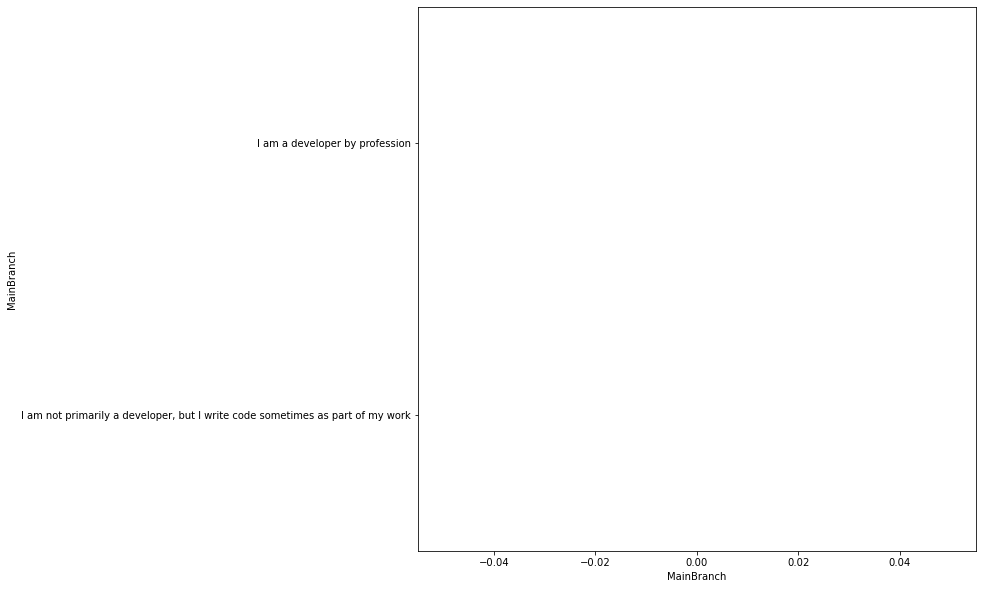

In [144]:
# your code goes here
plt.figure(figsize=(10,10))
sns.barplot(x=df.MainBranch.value_counts(),y=df.MainBranch, orient='h')
plt.show()


Close the database connection.


In [145]:
df_developers = pd.read_sql("SELECT * FROM DevType", conn)

In [146]:
df_developers.DevType.value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
